In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp
import scipy.special
import seaborn as sns
import pandas as pd
import random
import scipy.stats
sns.set(style="whitegrid",font_scale=1.5)

df = pd.read_csv('/Users/kristenlok/Downloads/tc_data.csv') 

In [2]:
df['f_trafo'] = np.arcsin(2*df['S freq'] - 1) #perform variance stabilizing transform
df.head(50)

,Unnamed: 0,group,time point,time,well,S freq,lambda,total count,yfp mean,bfp mean,dilution,f_trafo
0,0,1,0,0.000000,A1,0.028223,2.013966,21093,7638.835938,8828.968750,0.05,-1.233200
1,1,1,0,0.000000,A2,0.028223,2.013966,21093,7638.835938,8828.968750,0.05,-1.233200
2,2,1,0,0.000000,A3,0.028223,2.013966,21093,7638.835938,8828.968750,0.05,-1.233200
3,3,1,0,0.000000,A4,0.028223,2.013966,21093,7638.835938,8828.968750,0.05,-1.233200
4,4,1,0,0.000000,A5,0.028223,2.013966,21093,7638.835938,8828.968750,0.05,-1.233200
5,5,1,0,0.000000,A6,0.028223,2.013966,21093,7638.835938,8828.968750,0.05,-1.233200
6,6,2,0,0.000000,A7,0.947771,1.514433,24433,7535.210938,8429.955078,0.05,1.109649
7,7,2,0,0.000000,A8,0.947771,1.514433,24433,7535.210938,8429.955078,0.05,1.109649
8,8,2,0,0.000000,A9,0.947771,1.514433,24433,7535.210938,8429.955078,0.05,1.109649
9,9,2,0,0.000000,A10,0.947771,1.514433,24433,7535.210938,8429.955078,0.05,1.109649


In [3]:
# make dictionary to associate number codes to legible group names
names = {
    1:'L in maj, S in min',
    2:'S in maj, L in min',
    3:'Sl in maj, S in min',
    4:'S in maj, Sl in min',
}

# apply group names
df['group_name'] = df['group'].apply(lambda x: names[x])


# count how many replicates are in each group, and put it in a new column
x=df.groupby(by=['group_name','time']).count().reset_index().rename(columns={'f_trafo':'nreps'})
df=df.merge(x[['group_name','time','nreps']],on=['group_name','time'],how='left')
df.head(50)

,Unnamed: 0,group,time point,time,well,S freq,lambda,total count,yfp mean,bfp mean,dilution,f_trafo,group_name,nreps
0,0,1,0,0.000000,A1,0.028223,2.013966,21093,7638.835938,8828.968750,0.05,-1.233200,"L in maj, S in min",6
1,1,1,0,0.000000,A2,0.028223,2.013966,21093,7638.835938,8828.968750,0.05,-1.233200,"L in maj, S in min",6
2,2,1,0,0.000000,A3,0.028223,2.013966,21093,7638.835938,8828.968750,0.05,-1.233200,"L in maj, S in min",6
3,3,1,0,0.000000,A4,0.028223,2.013966,21093,7638.835938,8828.968750,0.05,-1.233200,"L in maj, S in min",6
4,4,1,0,0.000000,A5,0.028223,2.013966,21093,7638.835938,8828.968750,0.05,-1.233200,"L in maj, S in min",6
5,5,1,0,0.000000,A6,0.028223,2.013966,21093,7638.835938,8828.968750,0.05,-1.233200,"L in maj, S in min",6
6,6,2,0,0.000000,A7,0.947771,1.514433,24433,7535.210938,8429.955078,0.05,1.109649,"S in maj, L in min",6
7,7,2,0,0.000000,A8,0.947771,1.514433,24433,7535.210938,8429.955078,0.05,1.109649,"S in maj, L in min",6
8,8,2,0,0.000000,A9,0.947771,1.514433,24433,7535.210938,8429.955078,0.05,1.109649,"S in maj, L in min",6
9,9,2,0,0.000000,A10,0.947771,1.514433,24433,7535.210938,8429.955078,0.05,1.109649,"S in maj, L in min",6


In [4]:
#calculate variance
dfo=df[df['time']>0].groupby(by=['group_name','time','nreps']).var().reset_index()
dfo.head(50)

,group_name,time,nreps,Unnamed: 0,group,time point,S freq,lambda,total count,yfp mean,bfp mean,dilution,f_trafo
0,"L in maj, S in min",0.500000,6,3.5,0.0,0.0,0.000011,0.002474,1.122827e+04,121.720160,2549.778483,0.0,0.000363
1,"L in maj, S in min",1.816667,6,3.5,0.0,0.0,0.000027,0.004745,1.651542e+05,496.402828,1418.595632,0.0,0.000409
2,"L in maj, S in min",3.250000,6,3.5,0.0,0.0,0.000014,0.038066,5.381752e+06,1185.763004,2334.758329,0.0,0.000293
3,"L in maj, S in min",4.533333,6,3.5,0.0,0.0,0.000060,0.030513,3.489365e+06,564.374550,989.141437,0.0,0.001228
4,"L in maj, S in min",5.816667,6,3.5,0.0,0.0,0.000009,0.015053,1.943208e+06,949.526501,42.977151,0.0,0.000321
5,"L in maj, S in min",7.133333,6,3.5,0.0,0.0,0.000014,0.002368,4.272858e+05,2601.945359,795.486048,0.0,0.000536
6,"L in maj, S in min",24.283333,6,3.5,0.0,0.0,0.000050,0.061320,2.066652e+06,23109.835780,3763.449775,0.0,0.001294
7,"S in maj, L in min",0.800000,6,3.5,0.0,0.0,0.000042,0.000468,9.980680e+04,123.979064,453.176589,0.0,0.000832
8,"S in maj, L in min",2.200000,6,3.5,0.0,0.0,0.000013,0.001075,1.524520e+05,416.333999,1071.514208,0.0,0.000448
9,"S in maj, L in min",3.600000,6,3.5,0.0,0.0,0.000016,0.001939,2.367361e+06,72.075407,357.832671,0.0,0.000379


In [5]:
# calculate upper and lower CIs
alpha=0.32
dfo['u'] = (dfo['nreps'] - 1)*dfo['f_trafo']/sp.stats.chi2.isf(1-alpha/2, dfo['nreps']-1) - dfo['f_trafo']
dfo['l'] = dfo['f_trafo'] - (dfo['nreps'] - 1)*dfo['f_trafo']/sp.stats.chi2.isf(alpha/2, dfo['nreps']-1)


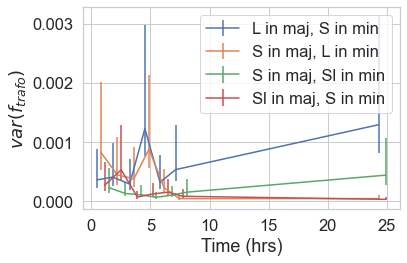

In [6]:
# plot
plt.figure()
for g,group in dfo.groupby(by='group_name'):
    err=np.array(group[['l','u']]).T
    plt.errorbar(group['time'],group['f_trafo'],yerr=err,label=g)

plt.xlabel('Time (hrs)')
plt.ylabel(r'$var(f_{trafo})$')
plt.legend()
plt.tight_layout()
plt.savefig('var_overtime.png',dpi=500)